Q1, Drop the fur_color using pd.drop

In [186]:
# Import Libraries
import numpy as np # numpy
import pandas as pd # pandas for datasets

In [187]:
import math

In [188]:
data = {
    "height": [62, 55, 54, 50],
    "weight": [55, 44, 50, 48],
    "tail_length": [12, 2, 3, 5],
    "tail_width": [2, 3, 2, 4],
    "fur_color": ["brown", "yellow", "brown", "yellow"],
    "species": ["dog", "cat", "dog", "cat"]
}

Animal_Data = pd.DataFrame(data)
Animal_Data=Animal_Data.drop(columns=["fur_color"])


In [189]:
target= Animal_Data["species"]
data = Animal_Data.loc[:,"height":"tail_width"]

In [190]:
target

0    dog
1    cat
2    dog
3    cat
Name: species, dtype: object

array([[<Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='tail_length', ylabel='height'>,
        <Axes: xlabel='tail_width', ylabel='height'>],
       [<Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='tail_length', ylabel='weight'>,
        <Axes: xlabel='tail_width', ylabel='weight'>],
       [<Axes: xlabel='height', ylabel='tail_length'>,
        <Axes: xlabel='weight', ylabel='tail_length'>,
        <Axes: xlabel='tail_length', ylabel='tail_length'>,
        <Axes: xlabel='tail_width', ylabel='tail_length'>],
       [<Axes: xlabel='height', ylabel='tail_width'>,
        <Axes: xlabel='weight', ylabel='tail_width'>,
        <Axes: xlabel='tail_length', ylabel='tail_width'>,
        <Axes: xlabel='tail_width', ylabel='tail_width'>]], dtype=object)

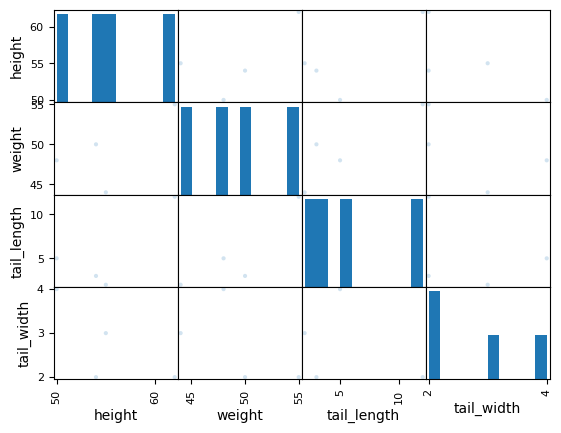

In [191]:
pd.plotting.scatter_matrix(pd.DataFrame(data=data), alpha=0.2)

In [192]:

# Shuffle the DataFrame rows
data = data.sample(frac=1).reset_index(drop=True)

# We will use all 4 examples as trainingset

In [193]:
data

,height,weight,tail_length,tail_width
0,54,50,3,2
1,55,44,2,3
2,50,48,5,4
3,62,55,12,2


In [194]:
# As required
k = 3
testX = pd.DataFrame(
    data = {
    "height": [55],
    "weight": [57],
    "tail_length": [8],
    "tail_width": [5],
}
)
distances = pd.DataFrame(
    data = {
        "Distance":[0,0,0,0]
    }
)
for i in range(0,3):
    row = data.iloc[i]
    distance = 0
    for j in range(0,3):
        distance = np.sqrt(np.sum(np.square(row[j] - testX.iloc[0][j])))
    distances["Distance"][i] = distance


/var/folders/mj/y3mghvl90p91nkgx8lglzrqw0000gn/T/ipykernel_16794/1548940541.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance = np.sqrt(np.sum(np.square(row[j] - testX.iloc[0][j])))
/var/folders/mj/y3mghvl90p91nkgx8lglzrqw0000gn/T/ipykernel_16794/1548940541.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_i

In [195]:
distances

,Distance
0,5
1,6
2,3
3,0


In [196]:
print(distances)

   Distance
0         5
1         6
2         3
3         0


In [197]:
indices = np.argsort(distances["Distance"][1:])


In [198]:
neighborYs = target[indices]

In [199]:
print(neighborYs)

2    dog
1    cat
0    dog
Name: species, dtype: object


Final Guess is 2 because there are 2 dogs and 1 cats in the 3 nearest neighbors

Weight is the most important feature because it contributes to distances the most ( Biggest Gap between training and testing data)

One Hot Encoding for Q2

In [200]:
# Use number instead of pandas

data = [
    [62, 55, 12, 2, 'brown', 'dog'],
    [55, 44, 2, 3, 'yellow', 'cat'],
    [54, 50, 3, 2, 'brown', 'dog'],
    [50, 48, 5, 4, 'yellow', 'cat']
]

x' = \frac((x - x_min),( x_max-x_min))


In [211]:
fur_color_map = {'brown': [1, 0], 'yellow': [0, 1]}
species_map = {'dog': [1, 0], 'cat': [0, 1]}

X = []
y = []
for row in data:
    numerical_features = row[:4]
    fur_color_encoded = fur_color_map[row[4]]
    species_encoded = species_map[row[5]]
    X.append(numerical_features + fur_color_encoded)
    y.append(species_encoded)
trainX = np.array(X)
trainY = np.array(y)

In [221]:
numerical_features = trainX[:, :4]
min_vals = numerical_features.min(axis=0)
max_vals = numerical_features.max(axis=0)
scaled_numerical_features = (numerical_features - min_vals) / (max_vals - min_vals)

# Combine scaled numerical features with encoded categorical data
trainX_normalized = np.hstack([scaled_numerical_features, trainX[:, 4:]])


In [223]:
print(trainX_normalized)

[[1.         1.         1.         0.         1.         0.        ]
 [0.41666667 0.         0.         0.5        0.         1.        ]
 [0.33333333 0.54545455 0.1        0.         1.         0.        ]
 [0.         0.36363636 0.3        1.         0.         1.        ]]


In [226]:
testX = np.array([55,57,8,5,0,1])

In [218]:
k=3
# 1. calculate distances between test examples and training examples
distances = np.zeros((len(trainX), len(testX)))
for i in range(len(trainX)):
    for j in range(len(testX)):
        distances[i,j] = np.sqrt(np.sum(np.square(trainX[i] - testX[j])))

# 2. for each data point, select k closest training instances


In [220]:
print(distances)

[[103.18914672 107.07007051  72.73238618  76.47221718  83.77350416
   82.21921916]
 [107.58717396 111.79892665  60.65476074  63.83572667  70.5336799
   69.07242576]
 [107.14476189 111.28342195  63.67102952  66.93280212  73.68853371
   72.22188034]
 [105.43244282 109.67223897  59.1776985   62.57795139  69.61321714
   68.08817812]]


In [ ]:

for j in range(4):
    indices = np.argsort(distances[:,j])[0:k]
    neighborYs = trainY[indices]
    # Get most common vote https://stackoverflow.com/questions/6252280/find-the-most-frequent-number-in-a-numpy-array
    counts = np.bincount(neighborYs)


In [184]:
!jupyter nbconvert --to html Q1.ipynb

[NbConvertApp] Converting notebook Q1.ipynb to html
[NbConvertApp] Writing 629726 bytes to Q1.html
